# BIL 366 Data Mining: Homework-1
### Bilinmesi gerekenler
data exploration,
pandas,numpy, matplotlib.pyplot
### Öğrenme Hedefleri 
Pandas kullanılarak temel data exploration ve visualization


### Giriş
Covid süresince Türkiye location datasından Google'in elde etmiş olduğu mobility datası https://www.google.com/covid19/mobility/ sitesi üzerinden yayınlanmıştır.
Bu ödevde sizden bu datayla ilgili önanaliz yapıp raporlamanız istenmektedir. Datayı indirme ve yüklemede bir bütünlük olması açısından bu datayı drive üzerinden erişime açtım, aşağıdaki şekilde erişebilirsiniz.



In [3]:
import pandas as pd

#https://www.google.com/covid19/mobility/
url='https://drive.google.com/file/d/18gyHbx6rfogq3yQ-GR9COjcGgyYlCnBZ/view?usp=sharing'
url2='https://drive.google.com/uc?id=' + url.split('/')[-2]
df = pd.read_csv(url2)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167657 entries, 0 to 167656
Data columns (total 15 columns):
 #   Column                                              Non-Null Count   Dtype  
---  ------                                              --------------   -----  
 0   country_region_code                                 167657 non-null  object 
 1   country_region                                      167657 non-null  object 
 2   sub_region_1                                        167336 non-null  object 
 3   sub_region_2                                        141692 non-null  object 
 4   metro_area                                          0 non-null       float64
 5   iso_3166_2_code                                     25644 non-null   object 
 6   census_fips_code                                    0 non-null       float64
 7   place_id                                            167657 non-null  object 
 8   date                                                167657 non-n

### Yapılacaklar

####1.Data üzerinde 5li özet istatiski bilgileri gösteriniz. 

In [105]:
## satırda buluna non-null ifadeleri silmek için
df.dropna(subset = ['retail_and_recreation_percent_change_from_baseline'],inplace=True)

df.dropna(subset = ['grocery_and_pharmacy_percent_change_from_baseline'],inplace=True)

df.dropna(subset = ['transit_stations_percent_change_from_baseline'],inplace=True)

df.dropna(subset = ['workplaces_percent_change_from_baseline'],inplace=True)

df.dropna(subset = ['residential_percent_change_from_baseline'],inplace=True)

## sadece hangi columunda numeric sayılar var ise istatiski bilgileri gösteriyor
from pandas.api.types import is_numeric_dtype
for col in df.columns:
    if df[col].count()!=0: # (metro_area,census_fips_code) silmek için çünkü type float ama sütünün değerleri hepsin null
      if is_numeric_dtype(df[col]):
        print('%s:' % (col))
        print('\t Mean = %.2f' % df[col].mean())
        print('\t Standard deviation = %.2f' % df[col].std())
        print('\t Minimum = %.2f' % df[col].min())
        print('\t Maximum = %.2f' % df[col].max())

retail_and_recreation_percent_change_from_baseline:
	 Mean = -27.33
	 Standard deviation = 27.34
	 Minimum = -99.00
	 Maximum = 183.00
grocery_and_pharmacy_percent_change_from_baseline:
	 Mean = 2.16
	 Standard deviation = 29.02
	 Minimum = -97.00
	 Maximum = 169.00
parks_percent_change_from_baseline:
	 Mean = 9.47
	 Standard deviation = 51.66
	 Minimum = -98.00
	 Maximum = 512.00
transit_stations_percent_change_from_baseline:
	 Mean = -25.42
	 Standard deviation = 32.37
	 Minimum = -100.00
	 Maximum = 286.00
workplaces_percent_change_from_baseline:
	 Mean = -21.51
	 Standard deviation = 20.38
	 Minimum = -94.00
	 Maximum = 63.00
residential_percent_change_from_baseline:
	 Mean = 7.78
	 Standard deviation = 9.13
	 Minimum = -16.00
	 Maximum = 50.00


In [106]:
df['country_region_code'].value_counts()

TR    68332
Name: country_region_code, dtype: int64

In [97]:
print('Covariance:')
data.cov()

Covariance:


,retail_and_recreation_percent_change_from_baseline,grocery_and_pharmacy_percent_change_from_baseline,parks_percent_change_from_baseline,transit_stations_percent_change_from_baseline,workplaces_percent_change_from_baseline,residential_percent_change_from_baseline
retail_and_recreation_percent_change_from_baseline,747.356538,585.536752,1007.559602,657.207625,449.368050,-206.852564
grocery_and_pharmacy_percent_change_from_baseline,585.536752,842.450351,894.263173,554.428175,346.679392,-149.652078
parks_percent_change_from_baseline,1007.559602,894.263173,2668.560138,1083.177935,571.046751,-320.840233
transit_stations_percent_change_from_baseline,657.207625,554.428175,1083.177935,1047.574262,412.664301,-193.205247
workplaces_percent_change_from_baseline,449.368050,346.679392,571.046751,412.664301,415.393136,-154.366541
residential_percent_change_from_baseline,-206.852564,-149.652078,-320.840233,-193.205247,-154.366541,83.407590


####2.
Bu datadaki [9-14] sütunlarını birbirlerine karşı scatter plot ile çizerek aralarında herhangi bir correlation(positive, negative, none) olup olmadığını belirleyiniz. (fig, axs = plt.subplots(5,3) kullanabilirsiniz) 

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f9c896a7f50>,
      dtype=object)

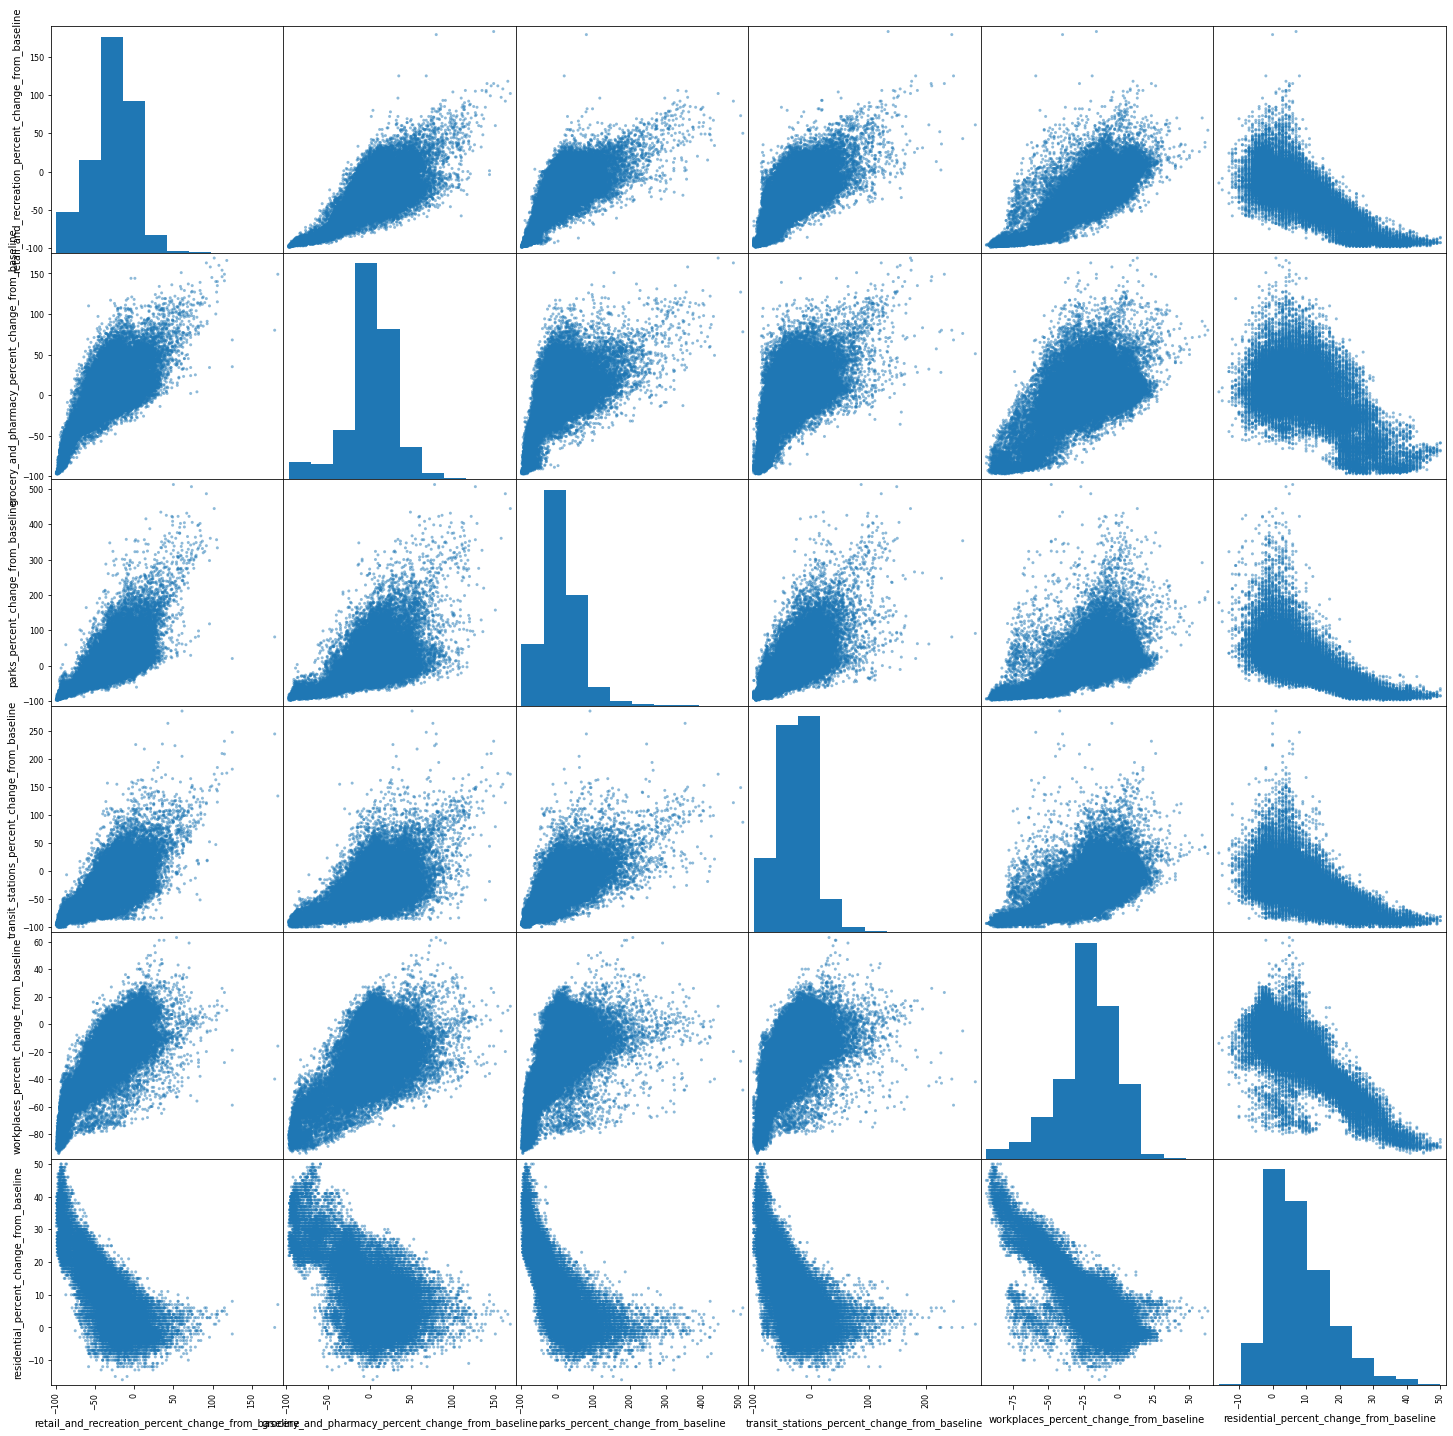

In [115]:
import matplotlib.pyplot as plt
import pandas as pd

pd.plotting.scatter_matrix(df.loc[:,'retail_and_recreation_percent_change_from_baseline':'residential_percent_change_from_baseline'],figsize=(25,25))


# histogram çıkıyor eğer ayın sütün birbirne karşlaşıyorsa.


In [108]:
print('Correlation:')
data.corr()
# 14.column ve değer bütün columnler arasında negative correlation var 
# 14.column hariç kalan bütün columnlar arasında pozitif correlation var  

Correlation:


,retail_and_recreation_percent_change_from_baseline,grocery_and_pharmacy_percent_change_from_baseline,parks_percent_change_from_baseline,transit_stations_percent_change_from_baseline,workplaces_percent_change_from_baseline,residential_percent_change_from_baseline
retail_and_recreation_percent_change_from_baseline,1.000000,0.737935,0.714513,0.742756,0.806508,-0.828503
grocery_and_pharmacy_percent_change_from_baseline,0.737935,1.000000,0.600328,0.590175,0.586039,-0.564557
parks_percent_change_from_baseline,0.714513,0.600328,1.000000,0.658299,0.531295,-0.667485
transit_stations_percent_change_from_baseline,0.742756,0.590175,0.658299,1.000000,0.625568,-0.653618
workplaces_percent_change_from_baseline,0.806508,0.586039,0.531295,0.625568,1.000000,-0.829317
residential_percent_change_from_baseline,-0.828503,-0.564557,-0.667485,-0.653618,-0.829317,1.000000


####3.
Bu datadaki [9-14] sütunlarını boxplot ile çizirek hangi sütünda outlier olup olmadığını belirleyiniz.
  
  Örnek 
  
 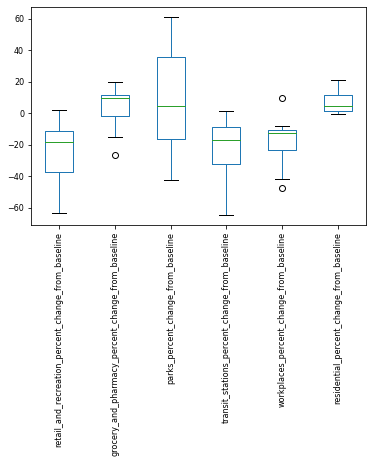



([<matplotlib.axis.XTick at 0x1e180e87670>,
 [Text(1, 0, '9.column'),
  Text(2, 0, '10.column'),
  Text(3, 0, '11.column'),
  Text(4, 0, '12.column'),
  Text(5, 0, '13.column'),
  Text(6, 0, '14.column')])

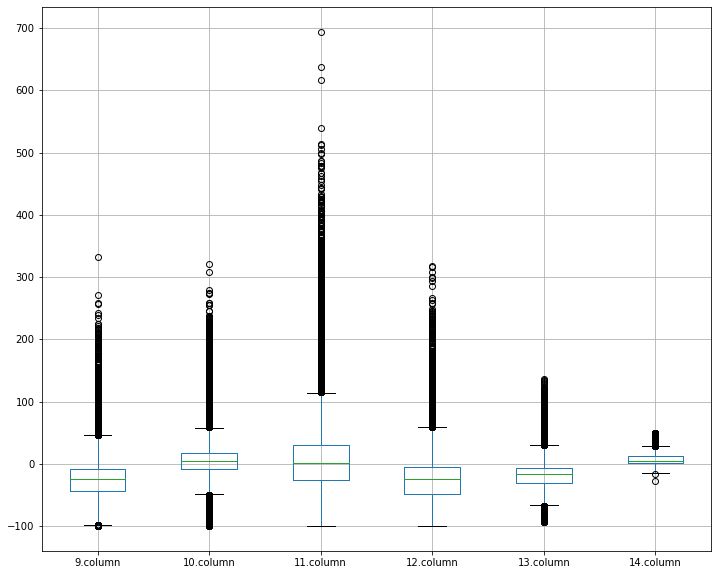

In [6]:
import matplotlib.pyplot as plt

data = pd.DataFrame()
from pandas.api.types import is_numeric_dtype
for col in df.columns:
    if is_numeric_dtype(df[col]):
        if df[col].count() != 0:
            data[col] = df[col]

data.boxplot(figsize=(12,10))
plt.xticks([1, 2, 3,4,5,6], ['9.column', '10.column', '11.column','12.column','13.column','14.column'])
#çıkan sonuç bütün sütünlerde outliers vardır 

####4.
Dataframe'i 8.sütun ('date') sütununda aylara göre gruplayarak [9-14] sütunlarını aşağıdakine benzer şekilde plot ediniz (groupby ve DatetimeIndex kullanarak yapabilirsiniz).

Örnek
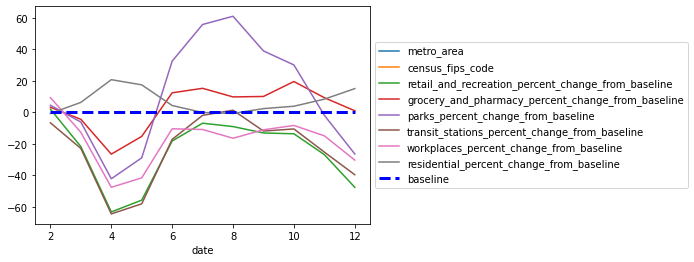




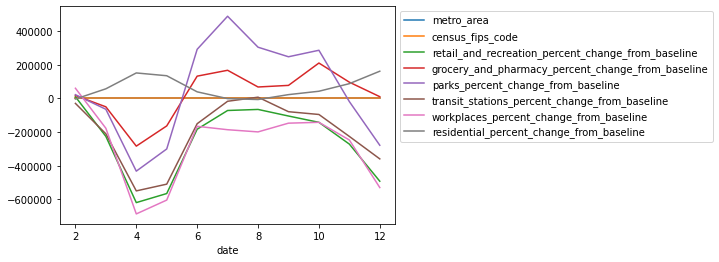

In [81]:
import plotly as plot
from matplotlib import pyplot as plt

df.index = pd.to_datetime(df['date'],format='%Y-%m-%d')
result1=df.groupby(df.index.month).sum()
result1.plot(kind='line')
plt.legend(bbox_to_anchor=(1.0, 1.0))
plt.show()

####5.
https://drive.google.com/file/d/1Eg8Lffm49bc-bGFkv_4ddrQw8U8WE6P4/view?usp=sharing  adresinde 2021 TR datası vardır. Bu datayıda 4.deki gibi gruplayarak, her iki datayı karşılaştırmak için aynı indeksli sütunlarını aylara göre aynı plotta gösteriniz. 

Örnek

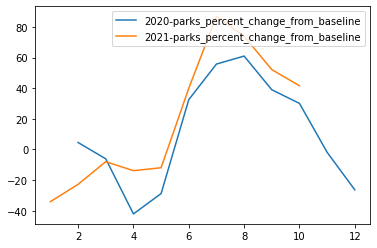

In [73]:
import pandas as pd

url = 'https://drive.google.com/file/d/1Eg8Lffm49bc-bGFkv_4ddrQw8U8WE6P4/view?usp=sharing'
path = 'https://drive.google.com/uc?export=download&id='+url.split('/')[-2]
df1 = pd.read_csv(path)

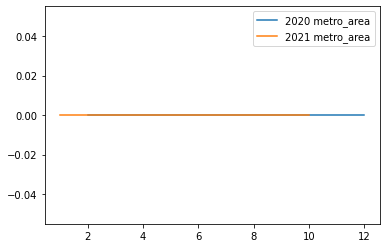

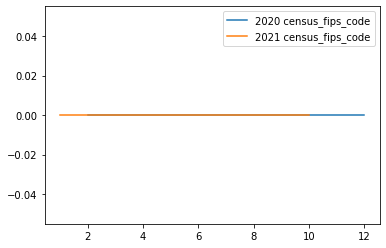

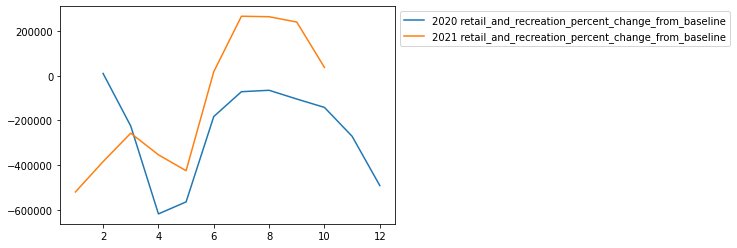

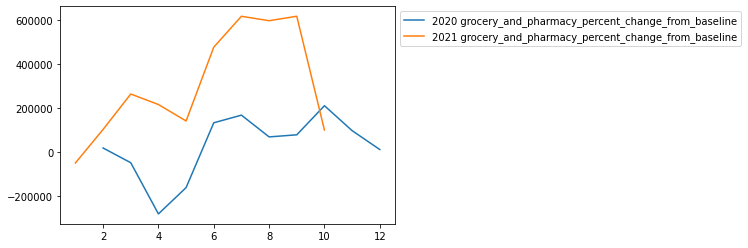

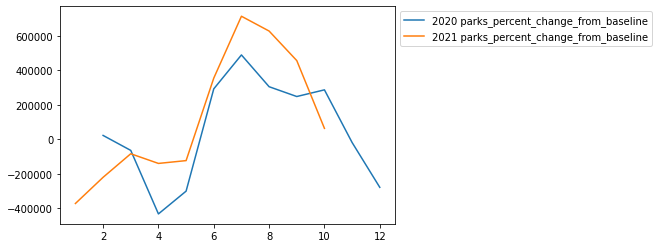

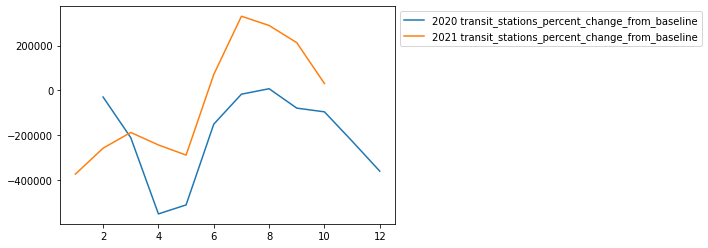

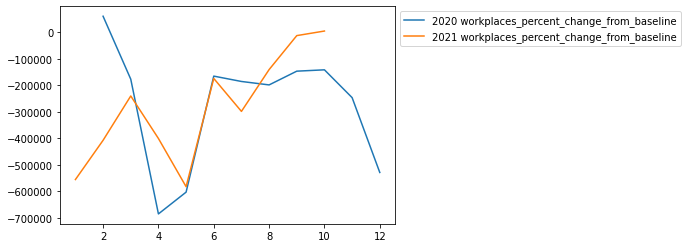

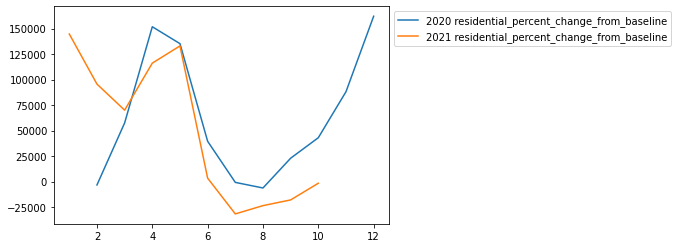

In [111]:
import plotly as plot
from matplotlib import pyplot as plt
df1.index = pd.to_datetime(df1['date'],format='%Y-%m-%d')
result2=df1.groupby(df1.index.month).sum()

for col in result1.columns:
    plt.plot(result1[col] , label='2020 ' + col)
    plt.plot(result2[col] , label='2021 ' +col)
    plt.legend(bbox_to_anchor=(1.0, 1.0))
    plt.show()



### Teslim
Her sorunun altında **hem kodu ve hemde çıktısını** içeren Jupiter notebook dökümanını **pdfe** çevirerek classroom üzerinden teslim ediniz(colab de direk print ile pdf alabilirsiniz).


### Değerlendirme
**Her soru 20 puandır.**